# Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/ML_data.xlsx')
data[data == '--'] = np.nan
data.dropna(inplace=True)
#Removing outliers
data = data.drop(data[data['PEG'] > 3000].index)
data = data.drop(data[data['PEG'] < -3000].index)
data = data.drop(data[data['CM'] > 10000000000].index)

data.head()

,Ticker,Name,PEG,CM,MorningStar
1,GHC UN Equity,Graham Holdings Co,21.826249,2205962496,Small Value
5,MSTR UW Equity,MicroStrategy Inc,-299.452624,3949142016,Small Growth
6,DDS UN Equity,Dillard's Inc,-64.137285,3818632192,Small Blend
9,CVCO UW Equity,Cavco Industries Inc,51.633790,2324008704,Small Growth
10,GPI UN Equity,Group 1 Automotive Inc,-65.141118,3575807232,Small Value


In [ ]:
features = data[['CM', 'PEG']]
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from scipy.sparse import random
kmeans = KMeans(n_clusters= 9, random_state = 19)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_centroids = kmeans.cluster_centers_
print(cluster_centroids)

[[-0.70531843 -0.11589534]
 [ 1.25516119  0.02404547]
 [ 0.44718529  7.00154397]
 [ 1.85707366  1.94435023]
 [ 3.02809     0.04789581]
 [-0.01289038 -4.2651973 ]
 [ 0.13168971  0.0596227 ]
 [-0.37323821  1.46251901]
 [-0.26147448 -1.19856389]]


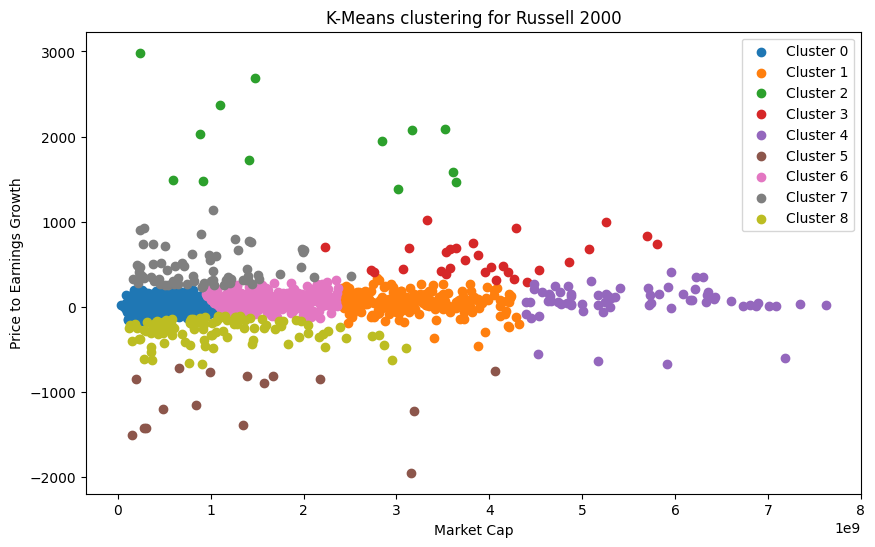

In [ ]:
# Plot the clusters
plt.figure(figsize = (10,6))
for cluster in range(9):
  cluster_data = data[data['Cluster'] == cluster]
  plt.scatter(cluster_data['CM'], cluster_data['PEG'], label =f'Cluster {cluster}')
plt.xlabel('Market Cap')
plt.ylabel('Price to Earnings Growth')
plt.title('K-Means clustering for Russell 2000')
plt.legend()

In [ ]:
morningstar_mapping = {
    'Mid Blend': 6,
    'Small Blend': 0,
    'Small Growth': 7,
    'Large Growth': 3,
    'Large Value': 4,
    'Small Value': 8,
    'Mid Growth': 2,
    'Mid Value': 5,
    'Large Blend':1
}
data['MorningStar_Cluster'] = data['MorningStar'].map(morningstar_mapping)

In [ ]:
# Check for any NaN values
has_nan = data['MorningStar_Cluster'].isna().any()
has_infinity = np.isinf(data['MorningStar_Cluster']).any()

print(f"Column has NaN values: {has_nan}")
print(f"Column has infinity values: {has_infinity}")

Column has NaN values: False
Column has infinity values: False


In [ ]:
nan_count = data['MorningStar_Cluster'].isna().sum()
print(f'Number of NaN values in column:', {nan_count})
data = data.dropna(subset=['MorningStar_Cluster'])
# Convert Float Column to a integer
data['MorningStar_Cluster'] = data['MorningStar_Cluster'].astype(int)

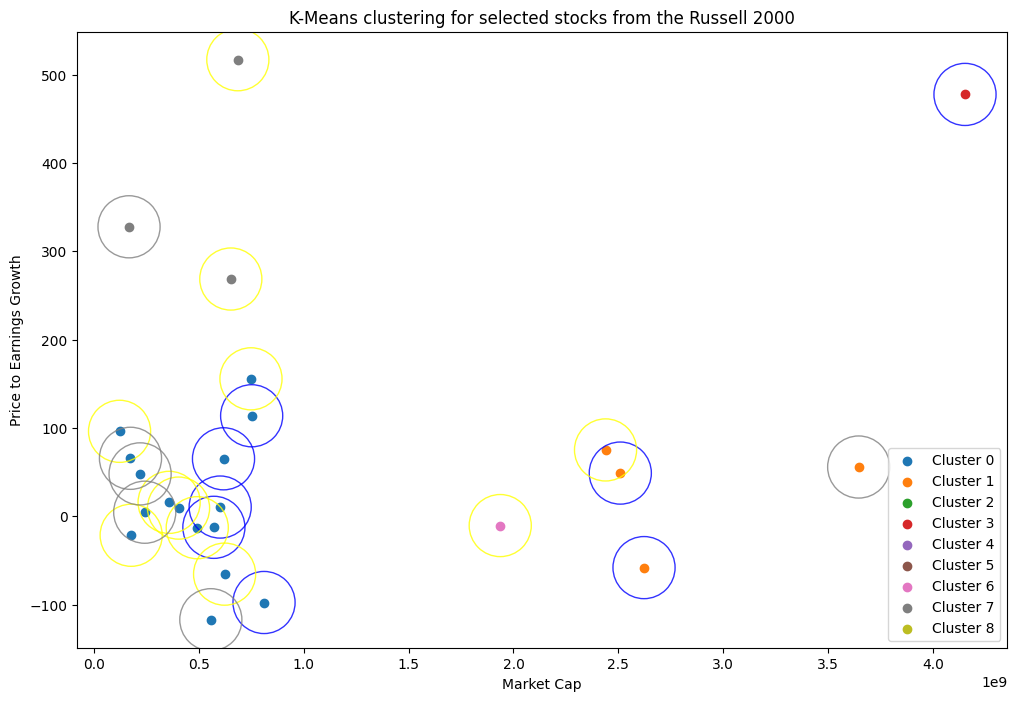

In [ ]:
# Choosing our companies randomly
random_sample = data.sample(n=25, random_state=24)

# Select the features for clustering
X = random_sample[['CM', 'PEG']]

# Scatter plot of market cap vs. PEG using bubbles
plt.figure(figsize=(12, 8))
for cluster in range(9):
    cluster_data = random_sample[random_sample['Cluster'] == cluster]
    plt.scatter(cluster_data['CM'], cluster_data['PEG'], label=f'Cluster {cluster}')

plt.xlabel('Market Cap')
plt.ylabel('Price to Earnings Growth')
plt.title('K-Means clustering for selected stocks from the Russell 2000')

# Letting the bubbles represent Morningstar ratings
morningstar_ratings = random_sample['MorningStar_Cluster'].unique()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey','yellow']
for rating in morningstar_ratings:
    rating_data = random_sample[random_sample['MorningStar_Cluster'] == rating]
    plt.scatter(rating_data['CM'], rating_data['PEG'],s = 2000, alpha = 0.8,facecolors='none',edgecolors = colors[rating])
plt.legend()
plt.show()